# 📊 Edge Caching Simulation — Analysis & Plots

This notebook visualizes the results of the Future Networks CDN caching simulation.
We generate plots for:

- Cache size sweep  
- Zipf exponent sweep  
- Edge count sweep  
- Policy comparisons  

Metrics include:
- Cache hit ratio  
- Average latency  
- 95th percentile latency  
- Origin load  


In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set_theme(style="darkgrid")
os.makedirs("screenshots", exist_ok=True)


In [329]:
cache_df = pd.read_csv("results/cache_size_results.csv")
zipf_df = pd.read_csv("results/zipf_results.csv")
edge_df = pd.read_csv("results/edge_count_results.csv")

cache_df, zipf_df, edge_df


(    cache_size   policy  hit_ratio  avg_latency  p95_latency  origin_load
 0           20      LRU   0.317195     71.45245          100     136561.0
 1           20      LFU   0.398780     64.10980          100     120244.0
 2           20     FIFO   0.271300     75.58300          100     145740.0
 3           20   RANDOM   0.269615     75.73465          100     146077.0
 4            0  NOCACHE   0.000000    100.00000          100     200000.0
 5           50      LRU   0.463740     58.26340          100     107252.0
 6           50      LFU   0.503805     54.65755          100      99239.0
 7           50     FIFO   0.407715     63.30565          100     118457.0
 8           50   RANDOM   0.407810     63.29710          100     118438.0
 9            0  NOCACHE   0.000000    100.00000          100     200000.0
 10         100      LRU   0.578220     47.96020          100      84356.0
 11         100      LFU   0.568910     48.79810          100      86218.0
 12         100     FIFO 

## SECTION A: CACHE SIZE PLOTS

## Hit Ratio vs Cache Size

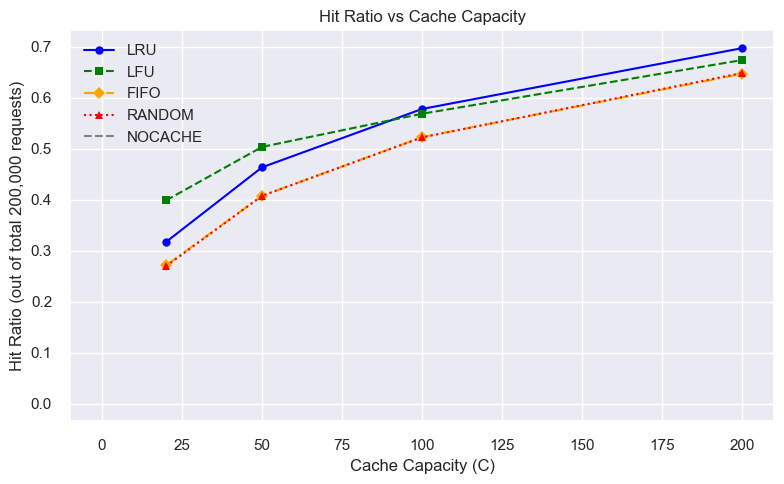

In [330]:
plt.figure(figsize=(8, 5))

# Define clearer colors and styles for each policy
custom_styles = {
    "LRU": {"color": "blue", "linestyle": "-", "marker": "o"},
    "LFU": {"color": "green", "linestyle": "--", "marker": "s"},
    "FIFO": {"color": "orange", "linestyle": "-.", "marker": "D"},
    "RANDOM": {"color": "red", "linestyle": ":", "marker": "^"},
    "NOCACHE": {"color": "gray", "linestyle": "--", "marker": "x"},
}

for pol in cache_df["policy"].unique():
    sub = cache_df[cache_df["policy"] == pol]
    style = custom_styles.get(pol, {})
    plt.plot(
        sub["cache_size"],
        sub["hit_ratio"],
        label=pol,
        color=style.get("color", None),
        linestyle=style.get("linestyle", "-"),
        marker=style.get("marker", "o"),
    )

plt.xlabel("Cache Capacity (C)")
plt.ylabel("Hit Ratio (out of total 200,000 requests)")
plt.title("Hit Ratio vs Cache Capacity")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()

# 3nu bir birinin yaninda goster

## Average Latency vs Cache Size

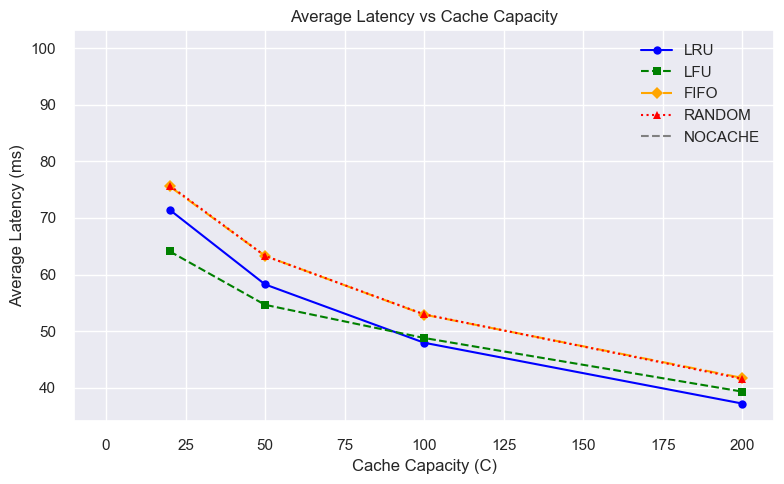

In [331]:
plt.figure(figsize=(8, 5))

# Define consistent visual styles per policy
custom_styles = {
    "LRU": {"color": "blue", "linestyle": "-", "marker": "o"},
    "LFU": {"color": "green", "linestyle": "--", "marker": "s"},
    "FIFO": {"color": "orange", "linestyle": "-.", "marker": "D"},
    "RANDOM": {"color": "red", "linestyle": ":", "marker": "^"},
    "NOCACHE": {"color": "gray", "linestyle": "--", "marker": "x"},
}

for pol in cache_df["policy"].unique():
    sub = cache_df[cache_df["policy"] == pol]
    style = custom_styles.get(pol, {})
    plt.plot(
        sub["cache_size"],
        sub["avg_latency"],
        label=pol,
        color=style.get("color", None),
        linestyle=style.get("linestyle", "-"),
        marker=style.get("marker", "o"),
    )

plt.xlabel("Cache Capacity (C)")
plt.ylabel("Average Latency (ms)")
plt.title("Average Latency vs Cache Capacity")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()


## Origin Load vs Cache Size

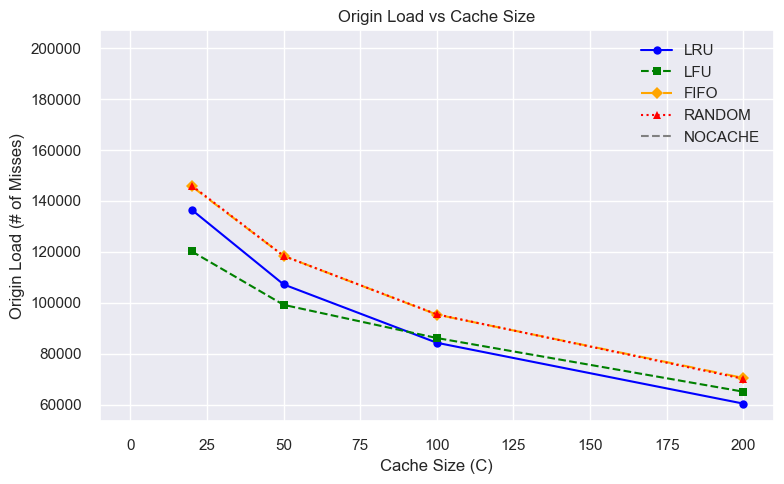

In [332]:
plt.figure(figsize=(8, 5))

# Define consistent visual styles per policy
custom_styles = {
    "LRU": {"color": "blue", "linestyle": "-", "marker": "o"},
    "LFU": {"color": "green", "linestyle": "--", "marker": "s"},
    "FIFO": {"color": "orange", "linestyle": "-.", "marker": "D"},
    "RANDOM": {"color": "red", "linestyle": ":", "marker": "^"},
    "NOCACHE": {"color": "gray", "linestyle": "--", "marker": "x"},
}

for pol in cache_df["policy"].unique():
    sub = cache_df[cache_df["policy"] == pol]
    style = custom_styles.get(pol, {})
    plt.plot(
        sub["cache_size"],
        sub["origin_load"],
        label=pol,
        color=style.get("color", None),
        linestyle=style.get("linestyle", "-"),
        marker=style.get("marker", "o"),
    )

plt.xlabel("Cache Size (C)")
plt.ylabel("Origin Load (# of Misses)")
plt.title("Origin Load vs Cache Size")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()

## Bar Chart: Hit Ratio per Policy per Cache Size

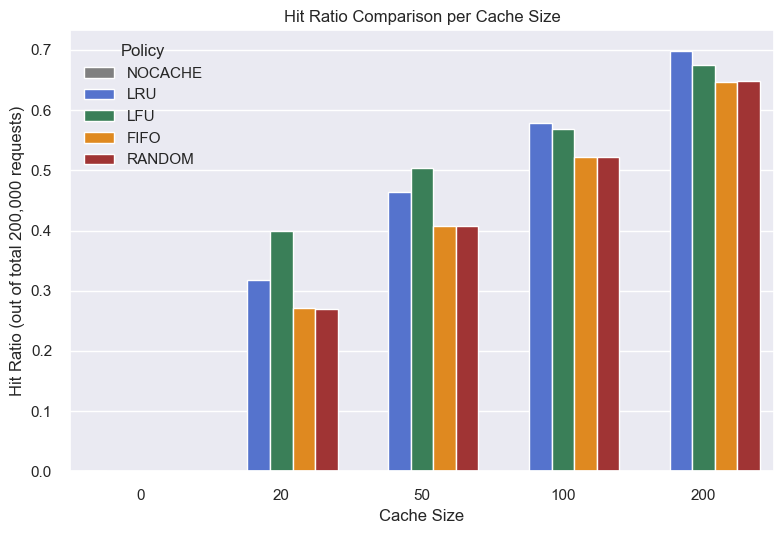

In [333]:
# Define custom color palette for consistency across plots
custom_palette = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

sns.barplot(
    data=cache_df,
    x="cache_size",
    y="hit_ratio",
    hue="policy",
    palette=custom_palette
)

plt.title("Hit Ratio Comparison per Cache Size")
plt.ylabel("Hit Ratio (out of total 200,000 requests)")
plt.xlabel("Cache Size")
plt.legend(title="Policy", loc="best")
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")


plt.show()

# dont show

## Scatter: Hit Ratio vs Latency

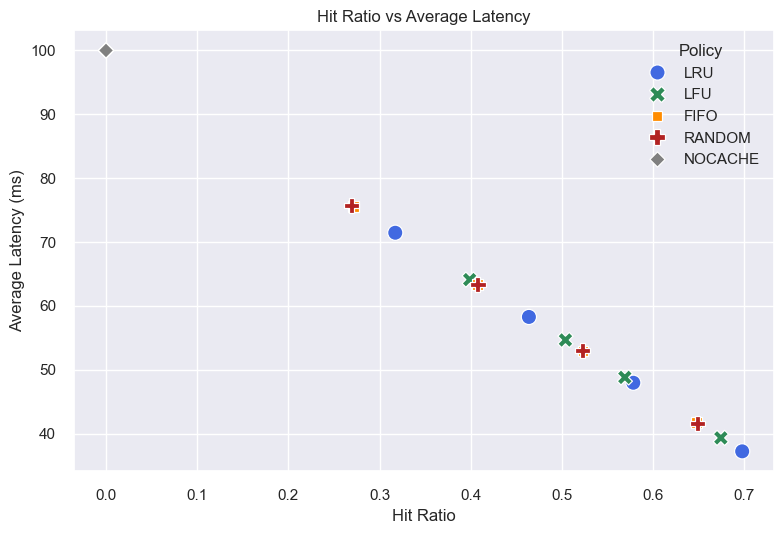

In [334]:
# Define consistent and distinguishable colors
custom_palette = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

sns.scatterplot(
    data=cache_df,
    x="hit_ratio",
    y="avg_latency",
    hue="policy",
    style="policy",
    palette=custom_palette,
    s=120  # size of markers
)

plt.title("Hit Ratio vs Average Latency")
plt.xlabel("Hit Ratio")
plt.ylabel("Average Latency (ms)")
plt.grid(True)
plt.legend(title="Policy", loc="best")
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()

# put this

# ZIPF EXPERIMENTS

## Hit Ratio vs Alpha

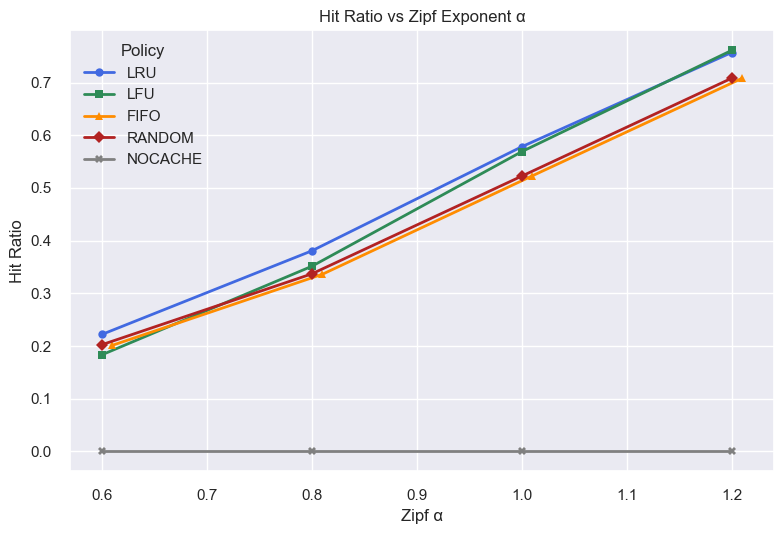

In [335]:
# Custom color palette
custom_palette = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

# Optional: distinct markers per policy
marker_map = {
    "LRU": "o",
    "LFU": "s",
    "FIFO": "^",      # triangle up
    "RANDOM": "D",    # diamond
    "NOCACHE": "X"    # X mark
}

for pol in zipf_df["policy"].unique():
    sub = zipf_df[zipf_df["policy"] == pol].copy()

    # Add small horizontal jitter only for FIFO to help visually separate overlapping lines
    if pol == "FIFO":
        sub["alpha"] = sub["alpha"] + 0.01  # slight offset

    plt.plot(
        sub["alpha"],
        sub["hit_ratio"],
        marker=marker_map.get(pol, "o"),
        label=pol,
        color=custom_palette.get(pol, None),
        linewidth=2
    )

plt.xlabel("Zipf α")
plt.ylabel("Hit Ratio")
plt.title("Hit Ratio vs Zipf Exponent α")
plt.legend(title="Policy", loc="best")
plt.grid(True)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()


# keep two, exclude origin load

## Average Latency vs Alpha

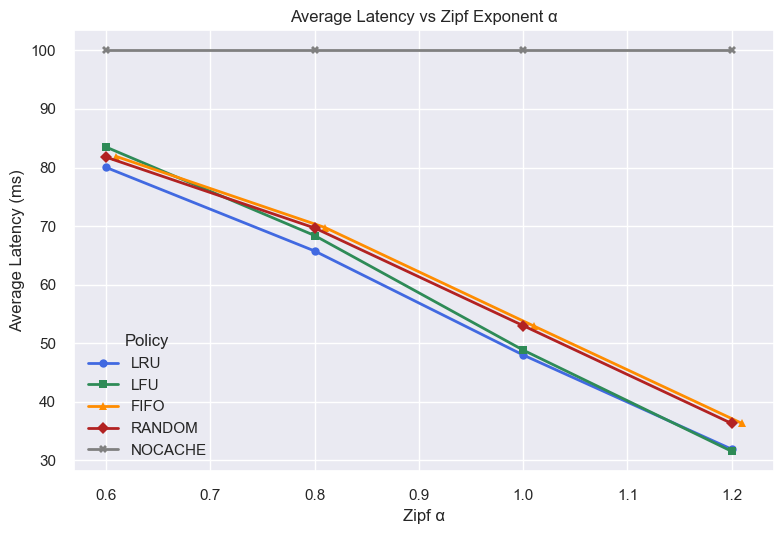

In [ ]:
# Custom colors
custom_palette = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

# Custom markers
marker_map = {
    "LRU": "o",
    "LFU": "s",
    "FIFO": "^",       # triangle up
    "RANDOM": "D",     # diamond
    "NOCACHE": "X"
}

for pol in zipf_df["policy"].unique():
    sub = zipf_df[zipf_df["policy"] == pol].copy()

    # Add small jitter to FIFO's alpha values
    if pol == "FIFO":
        sub["alpha"] += 0.01

    plt.plot(
        sub["alpha"],
        sub["avg_latency"],
        marker=marker_map.get(pol, "o"),
        label=pol,
        color=custom_palette.get(pol),
        linewidth=2
    )

plt.xlabel("Zipf α")
plt.ylabel("Average Latency (ms)")
plt.title("Average Latency vs Zipf Exponent α")
plt.legend(title="Policy", loc="best")
plt.grid(True)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")


plt.show()
# dont show

## Origin Load vs Alpha

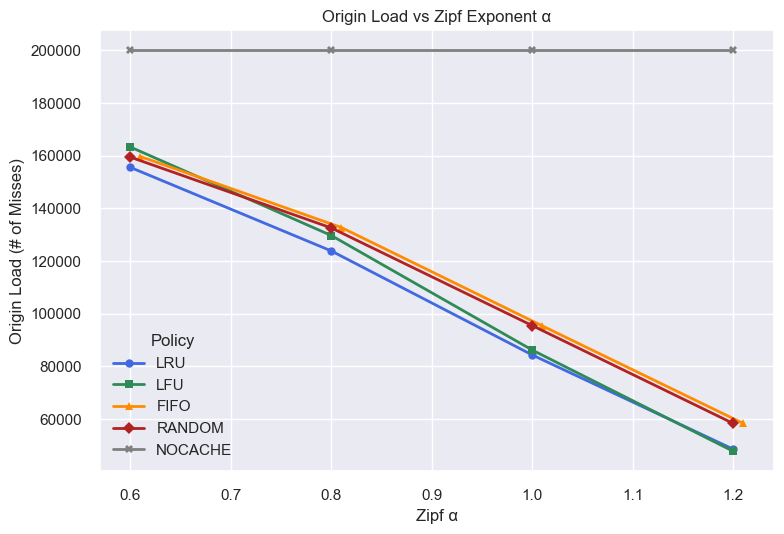

In [337]:
# Custom colors
custom_palette = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

# Custom markers
marker_map = {
    "LRU": "o",
    "LFU": "s",
    "FIFO": "^",       # triangle up
    "RANDOM": "D",     # diamond
    "NOCACHE": "X"
}

for pol in zipf_df["policy"].unique():
    sub = zipf_df[zipf_df["policy"] == pol].copy()

    # Jitter FIFO to make sure it doesn't get hidden
    if pol == "FIFO":
        sub["alpha"] += 0.01

    plt.plot(
        sub["alpha"],
        sub["origin_load"],
        marker=marker_map.get(pol, "o"),
        label=pol,
        color=custom_palette.get(pol),
        linewidth=2
    )

plt.xlabel("Zipf α")
plt.ylabel("Origin Load (# of Misses)")
plt.title("Origin Load vs Zipf Exponent α")
plt.legend(title="Policy", loc="best")
plt.grid(True)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")


plt.show()


## Bar Chart per Alpha

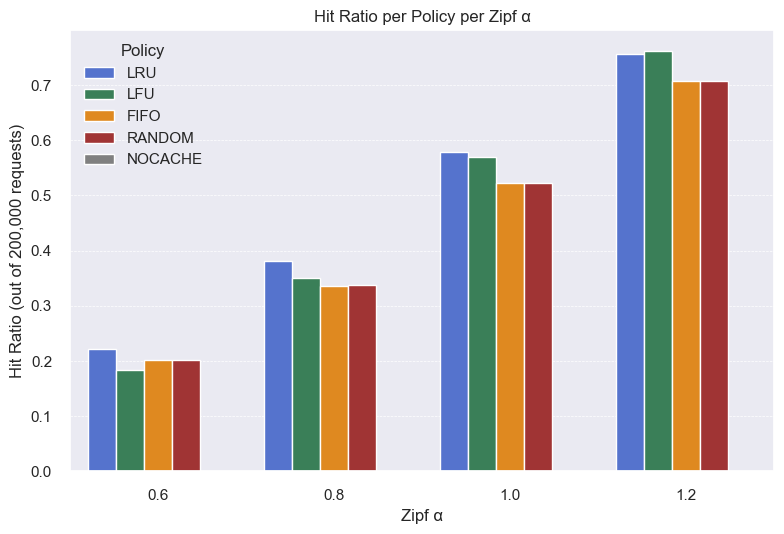

In [338]:
# Sort policies for consistent color mapping
ordered_policies = ["LRU", "LFU", "FIFO", "RANDOM", "NOCACHE"]

# Use a clear, colorblind-friendly palette
palette = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

sns.barplot(
    data=zipf_df,
    x="alpha",
    y="hit_ratio",
    hue="policy",
    hue_order=ordered_policies,
    palette=palette
)

plt.title("Hit Ratio per Policy per Zipf α")
plt.ylabel("Hit Ratio (out of 200,000 requests)")
plt.xlabel("Zipf α")
plt.legend(title="Policy", loc="best")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)


# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()

# show this as a better version of first graph

# SECTION C: EDGE COUNT EXPERIMENTS

## Hit Ratio vs Number of Edges

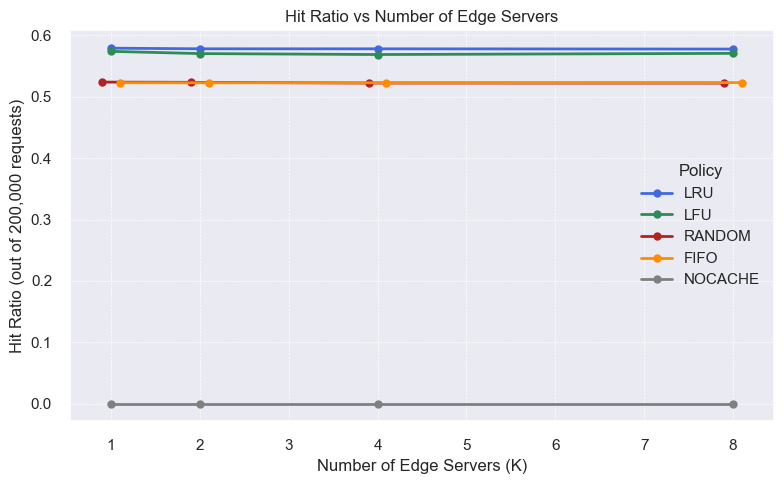

In [339]:
# Reorder so FIFO is drawn after RANDOM
ordered_policies = ["LRU", "LFU", "RANDOM", "FIFO", "NOCACHE"]
policy_colors = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

plt.figure(figsize=(8, 5))

for pol in ordered_policies:
    sub = edge_df[edge_df["policy"] == pol].copy()

    # Add small horizontal offset to FIFO so it's not hidden
    if pol == "FIFO":
        sub["n_edges"] = sub["n_edges"] + 0.1  # Shift slightly right
    elif pol == "RANDOM":
        sub["n_edges"] = sub["n_edges"] - 0.1  # Shift slightly left

    plt.plot(
        sub["n_edges"],
        sub["hit_ratio"],
        marker="o",
        label=pol,
        color=policy_colors[pol],
        linewidth=2,
        markersize=6
    )

plt.xlabel("Number of Edge Servers (K)")
plt.ylabel("Hit Ratio (out of 200,000 requests)")
plt.title("Hit Ratio vs Number of Edge Servers")
plt.legend(title="Policy")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()


# 3u yan yana

## Avg Latency vs Number of Edges

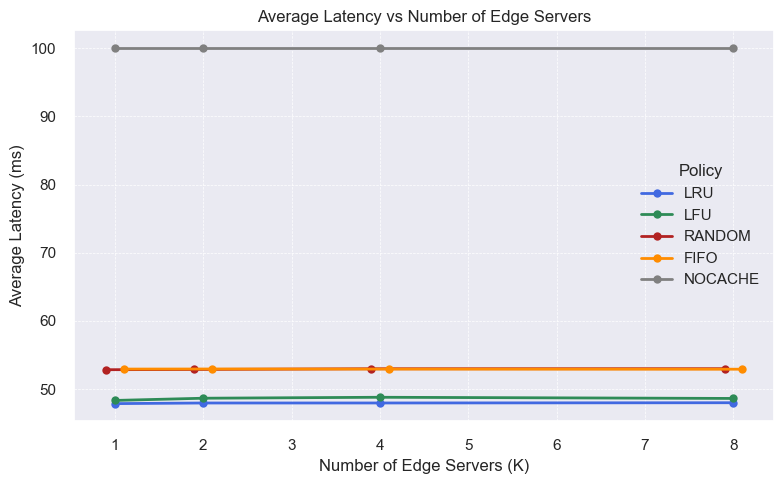

In [340]:
# Reorder policies so FIFO is drawn after RANDOM
ordered_policies = ["LRU", "LFU", "RANDOM", "FIFO", "NOCACHE"]
policy_colors = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

plt.figure(figsize=(8,5))

for pol in ordered_policies:
    sub = edge_df[edge_df["policy"] == pol].copy()

    # Slight offset to avoid overlapping lines
    if pol == "FIFO":
        sub["n_edges"] = sub["n_edges"] + 0.1
    elif pol == "RANDOM":
        sub["n_edges"] = sub["n_edges"] - 0.1

    plt.plot(
        sub["n_edges"],
        sub["avg_latency"],
        marker="o",
        label=pol,
        color=policy_colors[pol],
        linewidth=2,
        markersize=6
    )

plt.xlabel("Number of Edge Servers (K)")
plt.ylabel("Average Latency (ms)")
plt.title("Average Latency vs Number of Edge Servers")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(title="Policy")
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()



## Origin Load vs Number of Edges

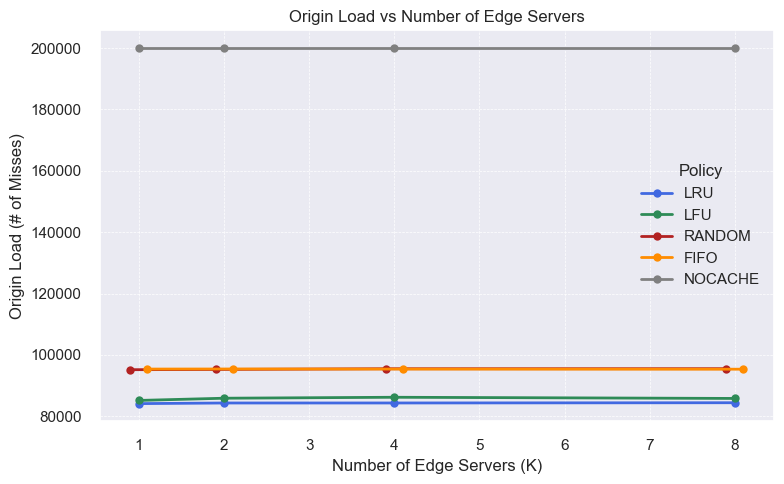

In [341]:
# Keep consistent order and color mapping
ordered_policies = ["LRU", "LFU", "RANDOM", "FIFO", "NOCACHE"]
policy_colors = {
    "LRU": "royalblue",
    "LFU": "seagreen",
    "FIFO": "darkorange",
    "RANDOM": "firebrick",
    "NOCACHE": "gray"
}

plt.figure(figsize=(8,5))

for pol in ordered_policies:
    sub = edge_df[edge_df["policy"] == pol].copy()

    # Slight horizontal offsets to prevent overlap
    if pol == "FIFO":
        sub["n_edges"] += 0.1
    elif pol == "RANDOM":
        sub["n_edges"] -= 0.1

    plt.plot(
        sub["n_edges"],
        sub["origin_load"],
        marker="o",
        label=pol,
        color=policy_colors[pol],
        linewidth=2,
        markersize=6
    )

plt.xlabel("Number of Edge Servers (K)")
plt.ylabel("Origin Load (# of Misses)")
title="Origin Load vs Number of Edge Servers"
plt.title(title)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(title="Policy")
plt.tight_layout()

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()




# SECTION D: COMBINED ANALYSIS

## Hit Ratio Comparison Heatmap (Policy × α)

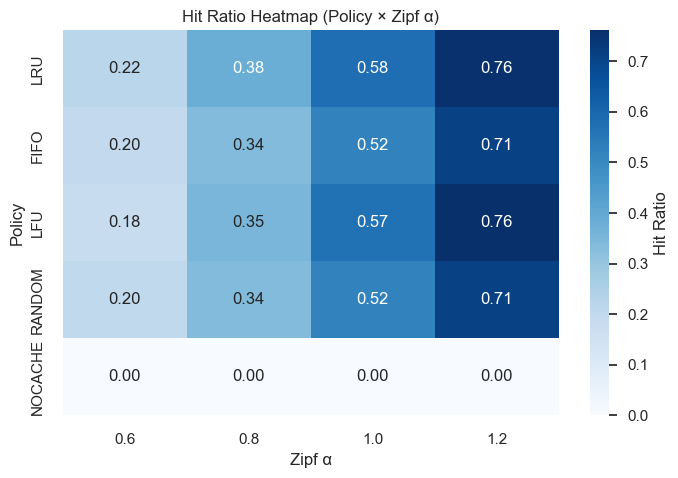

In [342]:
pivot = zipf_df.pivot(index="policy", columns="alpha", values="hit_ratio")

desired_order = ["LRU", "FIFO", "LFU", "RANDOM", "NOCACHE"]
pivot = pivot.loc[desired_order]

plt.figure(figsize=(8,5))
ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Hit Ratio Heatmap (Policy × Zipf α)")
plt.xlabel("Zipf α")
plt.ylabel("Policy")

# Add colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label("Hit Ratio")


# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()
# good. no cache last row

## Latency Comparison Heatmap

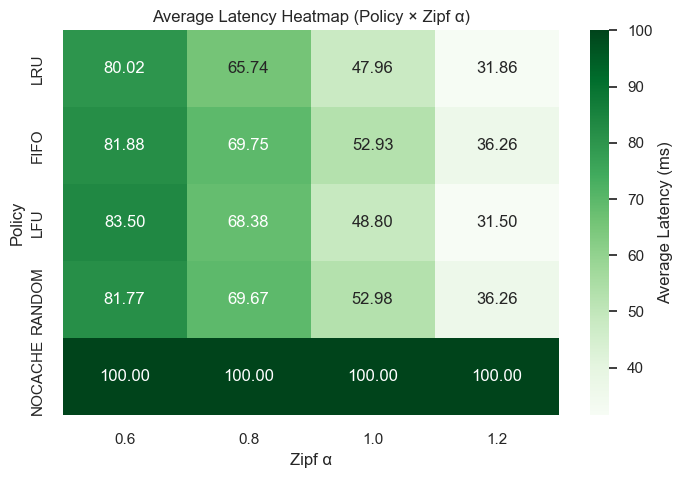

In [343]:
pivot = zipf_df.pivot(index="policy", columns="alpha", values="avg_latency")

desired_order = ["LRU", "FIFO", "LFU", "RANDOM", "NOCACHE"]
pivot = pivot.loc[desired_order]

plt.figure(figsize=(8,5))
ax = sns.heatmap(pivot, annot=True, cmap="Greens", fmt=".2f")
plt.title("Average Latency Heatmap (Policy × Zipf α)")
plt.xlabel("Zipf α")
plt.ylabel("Policy")

# Colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label("Average Latency (ms)")

# Save to screenshots/
os.makedirs("screenshots", exist_ok=True)
filename = plt.gca().get_title().replace(" ", "_") + ".png"
plt.savefig(os.path.join("screenshots", filename), dpi=300, bbox_inches="tight")

plt.show()
# good. no cache last row